Importations

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


Cleaning Data 

In [2]:

data_path = Path('../data')
csv_files = sorted(data_path.glob('season-*.csv'))

# Loading data 
dfs_raw = []
for file in csv_files:
    df= pd.read_csv(file)
    dfs_raw.append(df)

df = pd.concat(dfs_raw) #in case of problem we have to use ignore_index=True

# Not necesary 
df.drop(columns=['HTHG', 'HTAG', 'HTR'], inplace=True)

# Converting into appropriate data types
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['FTHG'] = df['FTHG'].astype(int)
df['FTAG'] = df['FTAG'].astype(int)
df['FTR'] = df['FTR'].astype('category')
df['Season'] = df['Season'].astype('category')

# Extracting date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek  # 0 = Lunes
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

# Creating new variables further analysis 
df['TotalGoals'] = df['FTHG'] + df['FTAG']
df['GoalDifference'] = df['FTHG'] - df['FTAG']
df['IsHomeWin'] = (df['FTR'] == 'H').astype(int)
df['IsDraw'] = (df['FTR'] == 'D').astype(int)
df['IsAwayWin'] = (df['FTR'] == 'A').astype(int)

#  Coding teams as categorical variables
df['HomeTeam'] = df['HomeTeam'].astype('category')
df['AwayTeam'] = df['AwayTeam'].astype('category')

# Verifing duplicates 
duplicates = df.duplicated(subset=['Date', 'HomeTeam', 'AwayTeam']).sum()
print(f"Duplicados encontrados: {duplicates}")

df.sort_values('Date', inplace=True)

# Necesary afther sorting 
df.reset_index(drop=True, inplace=True)

# 10. Ver resumen
print(df.info())
print(df.head())

# 11. Guardar (opcional)
df.to_csv('cleaned_football_data.csv', index=False)

Duplicados encontrados: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12324 entries, 0 to 12323
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            12324 non-null  datetime64[ns]
 1   HomeTeam        12324 non-null  category      
 2   AwayTeam        12324 non-null  category      
 3   FTHG            12324 non-null  int32         
 4   FTAG            12324 non-null  int32         
 5   FTR             12324 non-null  category      
 6   Season          12322 non-null  category      
 7   Year            12324 non-null  int64         
 8   Month           12324 non-null  int64         
 9   Day             12324 non-null  int64         
 10  DayOfWeek       12324 non-null  int64         
 11  IsWeekend       12324 non-null  int32         
 12  TotalGoals      12324 non-null  int32         
 13  GoalDifference  12324 non-null  int32         
 14  IsHomeWin       12324 non-nu

Measures of central tendency 


1. GOLES COMO LOCAL (GENERAL)
  Media:        1.55 goles
  Mediana:      1.00 goles
  Moda:         1 goles
  Desv. Estándar: 1.31
  Mínimo:       0 goles
  Máximo:       10 goles


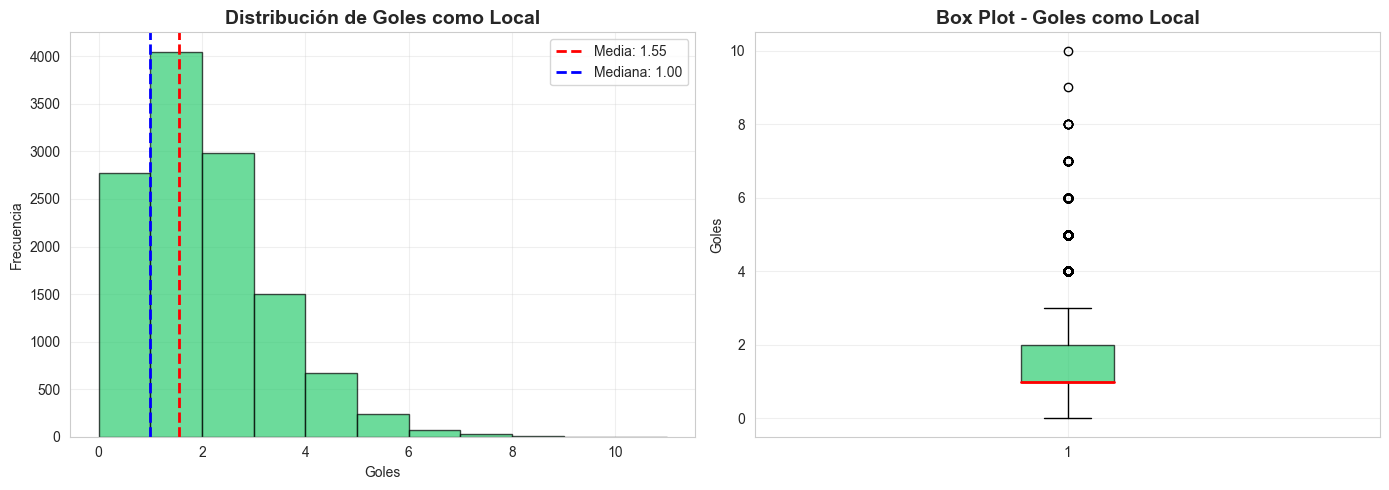


2. GOLES COMO VISITANTE (GENERAL)
  Media:        1.11 goles
  Mediana:      1.00 goles
  Moda:         1 goles
  Desv. Estándar: 1.11
  Mínimo:       0 goles
  Máximo:       8 goles


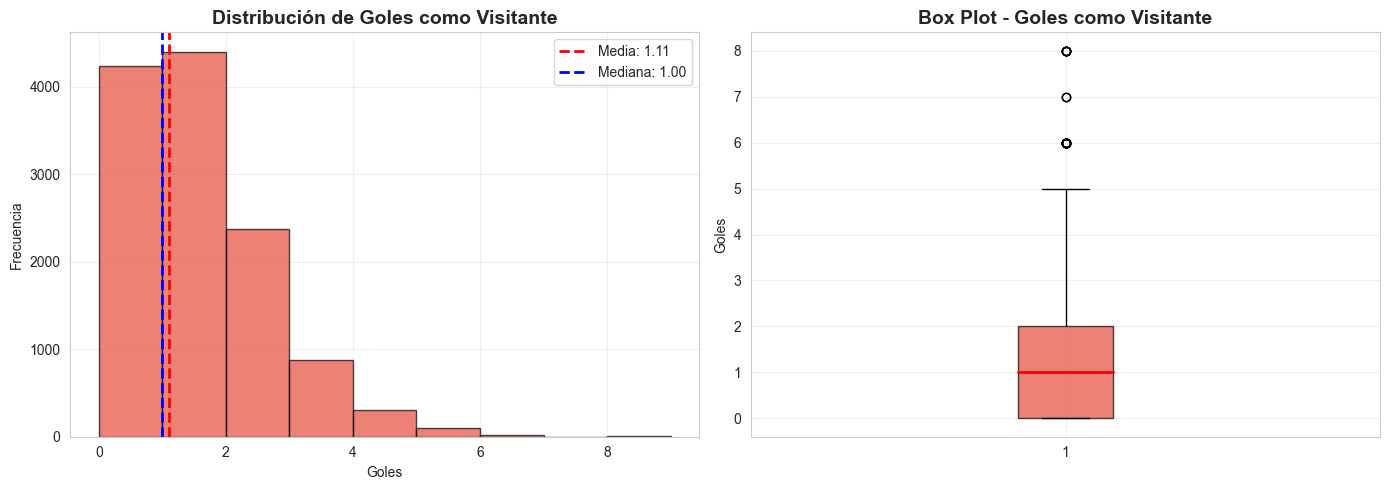

TypeError: boxplot() got an unexpected keyword argument 'tick_labels'

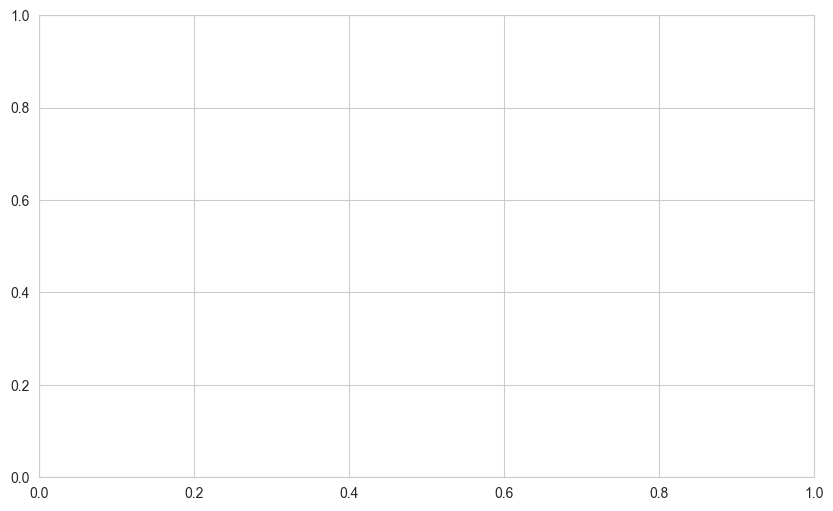

In [3]:
# Configuration of the visualitations 

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

# ============================================================================
# 1. GOLES COMO LOCAL (sin importar equipo ni temporada)
# ============================================================================
print("\n" + "=" * 80)
print("1. GOLES COMO LOCAL (GENERAL)")
print("=" * 80)
print(f"  Media:        {df['FTHG'].mean():.2f} goles")
print(f"  Mediana:      {df['FTHG'].median():.2f} goles")
print(f"  Moda:         {df['FTHG'].mode()[0]} goles")
print(f"  Desv. Estándar: {df['FTHG'].std():.2f}")
print(f"  Mínimo:       {df['FTHG'].min()} goles")
print(f"  Máximo:       {df['FTHG'].max()} goles")

# Gráfico
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(df['FTHG'], bins=range(0, df['FTHG'].max()+2), 
            color='#2ecc71', edgecolor='black', alpha=0.7)
axes[0].axvline(df['FTHG'].mean(), color='red', linestyle='--', 
               linewidth=2, label=f'Media: {df["FTHG"].mean():.2f}')
axes[0].axvline(df['FTHG'].median(), color='blue', linestyle='--', 
               linewidth=2, label=f'Mediana: {df["FTHG"].median():.2f}')
axes[0].set_title('Distribución de Goles como Local', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Goles')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['FTHG'], vert=True, patch_artist=True,
               boxprops=dict(facecolor='#2ecc71', alpha=0.7),
               medianprops=dict(color='red', linewidth=2))
axes[1].set_title('Box Plot - Goles como Local', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Goles')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('01_goles_local_general.png', dpi=300, bbox_inches='tight')
plt.show()



# ============================================================================
# 2. GOLES COMO VISITANTE (sin importar equipo ni temporada)
# ============================================================================
print("\n" + "=" * 80)
print("2. GOLES COMO VISITANTE (GENERAL)")
print("=" * 80)
print(f"  Media:        {df['FTAG'].mean():.2f} goles")
print(f"  Mediana:      {df['FTAG'].median():.2f} goles")
print(f"  Moda:         {df['FTAG'].mode()[0]} goles")
print(f"  Desv. Estándar: {df['FTAG'].std():.2f}")
print(f"  Mínimo:       {df['FTAG'].min()} goles")
print(f"  Máximo:       {df['FTAG'].max()} goles")

# Gráfico
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(df['FTAG'], bins=range(0, df['FTAG'].max()+2), 
            color='#e74c3c', edgecolor='black', alpha=0.7)
axes[0].axvline(df['FTAG'].mean(), color='red', linestyle='--', 
               linewidth=2, label=f'Media: {df["FTAG"].mean():.2f}')
axes[0].axvline(df['FTAG'].median(), color='blue', linestyle='--', 
               linewidth=2, label=f'Mediana: {df["FTAG"].median():.2f}')
axes[0].set_title('Distribución de Goles como Visitante', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Goles')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['FTAG'], vert=True, patch_artist=True,
               boxprops=dict(facecolor='#e74c3c', alpha=0.7),
               medianprops=dict(color='red', linewidth=2))
axes[1].set_title('Box Plot - Goles como Visitante', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Goles')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('02_goles_visitante_general.png', dpi=300, bbox_inches='tight')
plt.show()



# Comparación Local vs Visitante
fig, ax = plt.subplots(figsize=(10, 6))
positions = [1, 2]
data_to_plot = [df['FTHG'], df['FTAG']]
bp = ax.boxplot(data_to_plot, positions=positions, patch_artist=True,
               tick_labels=['Local', 'Visitante'])
bp['boxes'][0].set_facecolor('#2ecc71')
bp['boxes'][1].set_facecolor('#e74c3c')
ax.set_title('Comparación: Goles Local vs Visitante', fontsize=14, fontweight='bold')
ax.set_ylabel('Goles')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('03_comparacion_local_visitante.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 5. GOLES TOTALES POR TEMPORADA
# ============================================================================
print("\n" + "=" * 80)
print("5. GOLES TOTALES POR TEMPORADA")
print("=" * 80)

season_goals = df.groupby('Season').agg({
    'TotalGoals': ['mean', 'median', 'sum', 'count'],
    'FTHG': 'mean',
    'FTAG': 'mean'
}).round(2)
season_goals.columns = ['Media_Total', 'Mediana_Total', 'Total_Goles', 'Partidos', 
                        'Media_Local', 'Media_Visitante']

print(season_goals)

# Gráficos
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Promedio por temporada
season_goals['Media_Total'].plot(kind='bar', ax=axes[0, 0], color='#3498db', alpha=0.7)
axes[0, 0].set_title('Promedio de Goles por Partido - Por Temporada', fontweight='bold')
axes[0, 0].set_xlabel('Temporada')
axes[0, 0].set_ylabel('Promedio de Goles')
axes[0, 0].grid(alpha=0.3, axis='y')
axes[0, 0].tick_params(axis='x', rotation=45)

# Total de goles por temporada
season_goals['Total_Goles'].plot(kind='bar', ax=axes[0, 1], color='#9b59b6', alpha=0.7)
axes[0, 1].set_title('Total de Goles - Por Temporada', fontweight='bold')
axes[0, 1].set_xlabel('Temporada')
axes[0, 1].set_ylabel('Total de Goles')
axes[0, 1].grid(alpha=0.3, axis='y')
axes[0, 1].tick_params(axis='x', rotation=45)

# Evolución Local vs Visitante
season_goals[['Media_Local', 'Media_Visitante']].plot(ax=axes[1, 0], marker='o', linewidth=2)
axes[1, 0].set_title('Evolución: Goles Local vs Visitante por Temporada', fontweight='bold')
axes[1, 0].set_xlabel('Temporada')
axes[1, 0].set_ylabel('Promedio de Goles')
axes[1, 0].legend(['Local', 'Visitante'])
axes[1, 0].grid(alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# Box plot por temporada
df.boxplot(column='TotalGoals', by='Season', ax=axes[1, 1], patch_artist=True)
axes[1, 1].set_title('Distribución de Goles por Temporada', fontweight='bold')
axes[1, 1].set_xlabel('Temporada')
axes[1, 1].set_ylabel('Goles Totales')
axes[1, 1].get_figure().suptitle('')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('06_goles_por_temporada.png', dpi=300, bbox_inches='tight')
plt.show()


# ============================================================================
# 6. VICTORIAS POR TEMPORADA DE CADA EQUIPO
# ============================================================================
print("\n" + "=" * 80)
print("6. VICTORIAS POR TEMPORADA DE CADA EQUIPO")
print("=" * 80)

# Victorias como local
home_wins = df[df['FTR'] == 'H'].groupby(['Season', 'HomeTeam'],observed= True).size().reset_index(name='Victorias_Local')

# Victorias como visitante
away_wins = df[df['FTR'] == 'A'].groupby(['Season', 'AwayTeam'],observed= True).size().reset_index(name='Victorias_Visitante')

# Combinar
victories = pd.merge(home_wins, away_wins, 
                     left_on=['Season', 'HomeTeam'], 
                     right_on=['Season', 'AwayTeam'],how='outer')
victories['Equipo'] = victories['HomeTeam'].fillna(victories['AwayTeam'])
victories['Total_Victorias'] = victories['Victorias_Local'] + victories['Victorias_Visitante']
victories = victories[['Season', 'Equipo', 'Victorias_Local', 'Victorias_Visitante', 'Total_Victorias']]
victories = victories.sort_values(['Season', 'Total_Victorias'], ascending=[True, False])

# Resumen por equipo (todas las temporadas)
total_victories = victories.groupby('Equipo',observed= True).agg({
    'Victorias_Local': 'sum',
    'Victorias_Visitante': 'sum',
    'Total_Victorias': ['sum', 'mean']
}).round(2)
total_victories.columns = ['V_Local', 'V_Visitante', 'V_Total', 'V_Promedio']
total_victories = total_victories.sort_values('V_Total', ascending=False)

print("\nTop 10 Equipos con más victorias (todas las temporadas):")
print(total_victories.head(10))

# Gráfico - Top 15 equipos con más victorias
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

top15_victories = total_victories.head(15)

# Victorias totales
axes[0].barh(range(len(top15_victories)), top15_victories['V_Total'], color='#f39c12', alpha=0.7)
axes[0].set_yticks(range(len(top15_victories)))
axes[0].set_yticklabels(top15_victories.index)
axes[0].set_xlabel('Total de Victorias')
axes[0].set_title('Top 15 Equipos - Total de Victorias (Todas las Temporadas)', 
                  fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(alpha=0.3, axis='x')

# Victorias Local vs Visitante
x = range(len(top15_victories))
axes[1].barh([i - 0.2 for i in x], top15_victories['V_Local'], 
            height=0.4, label='Local', color='#2ecc71', alpha=0.7)
axes[1].barh([i + 0.2 for i in x], top15_victories['V_Visitante'], 
            height=0.4, label='Visitante', color='#e74c3c', alpha=0.7)
axes[1].set_yticks(x)
axes[1].set_yticklabels(top15_victories.index)
axes[1].set_xlabel('Victorias')
axes[1].set_title('Top 15 Equipos - Victorias Local vs Visitante', 
                  fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].invert_yaxis()
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('07_victorias_equipos_total.png', dpi=300, bbox_inches='tight')
plt.show()

# Victorias por temporada (equipos seleccionados - Top 5)
top5_teams = total_victories.head(5).index.tolist()
victories_top5 = victories[victories['Equipo'].isin(top5_teams)]

fig, ax = plt.subplots(figsize=(14, 7))
for equipo in top5_teams:
    team_data = victories_top5[victories_top5['Equipo'] == equipo]
    ax.plot(team_data['Season'], team_data['Total_Victorias'], 
           marker='o', linewidth=2, label=equipo)

ax.set_title('Evolución de Victorias por Temporada - Top 5 Equipos', 
            fontsize=14, fontweight='bold')
ax.set_xlabel('Temporada')
ax.set_ylabel('Victorias')
ax.legend(loc='best')
ax.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('08_evolucion_victorias_top5.png', dpi=300, bbox_inches='tight')
plt.show()